<a href="https://colab.research.google.com/github/A-Alviento/insertion-merge-hybrid-sort/blob/main/sc2001_ex_class_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Insertion Sort**

In [3]:
# Function to do insertion sort
def insertionSort(arr, numCmp):

	# Traverse through 1 to len(arr)
	for i in range(1, len(arr)):

		key = arr[i]

		# Move elements of arr[0..i-1], that are
		# greater than key, to one position ahead
		# of their current position
		j = i-1
		while j >= 0 and key < arr[j] :
				arr[j + 1] = arr[j]
				j -= 1
				numCmp[0]+=1
		arr[j + 1] = key

**Insertion Merge Sort Hybrid with Threshold n**


In [18]:
# Python program to implement a hybrid sort of insertion and merge sort with
# threshold of n before switching to insertion sort
def insertionMergeHybrid(arr, n, numCmp):
  # this block is entirely identical to mergesort except for the 
  # conditional value of len > 10
  if len(arr) > n:
    mid = len(arr)//2
    L = arr[:mid]
    R = arr[mid:]
    insertionMergeHybrid(L, n, numCmp)
    insertionMergeHybrid(R, n, numCmp)
    i=j=k=0

    while i<len(L) and j<len(R):
      if L[i] < R[j]:
        arr[k] = L[i]
        i+=1
      else:
        arr[k] = R[j]
        j += 1
      k += 1
      numCmp[0]+=1
    while i<len(L):
      arr[k] = L[i]
      i += 1
      k += 1
    while j < len(R):
      arr[k] = R[j]
      j += 1
      k += 1
  # once length of array is n or less, it switches to insertion sort
  else:
    insertionSort(arr, numCmp)
    

  

**Generate Random Array**

In [8]:
import numpy as np

# Python program to generate an array of size n with random values from
# 1 to 100
def ranArr(n):
  randnums = np.random.randint(1,101,n)
  return randnums


**c(i)**

n=1000:
mean: 6843 key comparisons
mean: 0.006899 seconds

n=10000:
mean: 103493 key comparisons
mean: 0.093980 seconds

n=100000:
mean: 1333651 key comparisons
mean: 1.254876 seconds

n=1000000:
mean: 16731828 key comparisons
mean: 15.380954 seconds

n=10000000:
mean: 202646698 key comparisons
mean: 180.344510 seconds



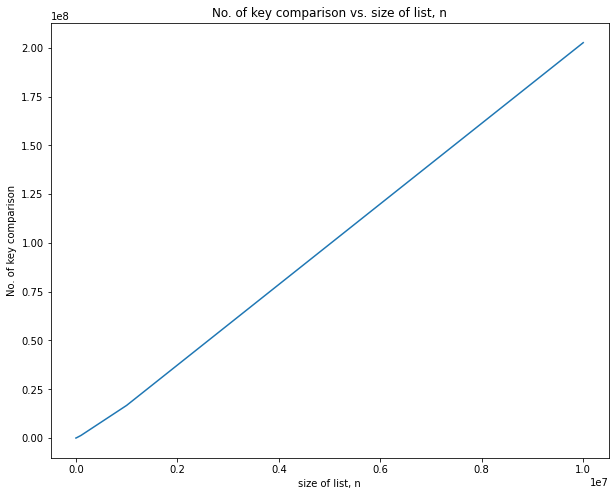

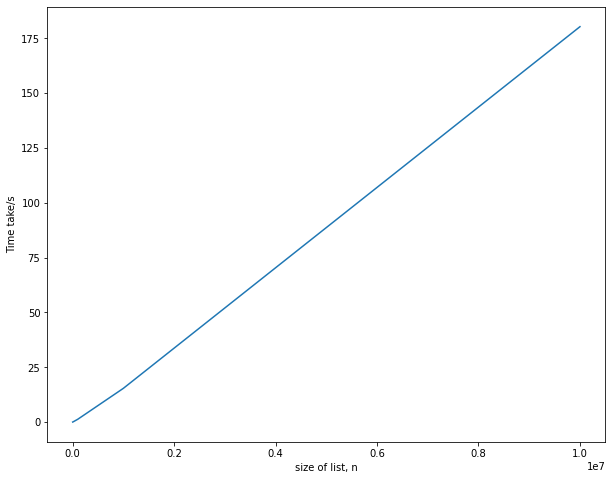

In [190]:
import timeit
import time
import numpy as np 
import matplotlib.pyplot as plt


# ii) test number of key comparison of different values of input list n with value of threshold S fixed

y_axis = []
y_axis_time = []

# threshold size
S = 10
# varying values of input list size, n
n = [1000, 10000, 100000, 1000000, 10000000]
# number of cases to do for each size n
case = 5

# holds variable for number of key comparison for each test
numCmp = [0]

mean = 0
time = 0

for i in n:
  print("n=%d:"%i)
  # we want to obtain ___ results of different random arrays for each n size for reducing bias
  for j in range(case):
    arr = ranArr(i)
    time += timeit.timeit(stmt='insertionMergeHybrid(arr,S,numCmp)', setup='', number=1, globals = globals())
    mean+=numCmp[0]
    numCmp[0] = 0
  mean = mean/case
  time = time/case
  y_axis.append(mean)
  y_axis_time.append(time)
  print("mean: %d key comparisons" %mean)
  print("mean: %f seconds" %time)
  mean = 0
  time = 0
  print()

x = np.array(n)
y = np.array(y_axis) 


# PLot
figure(figsize=(10, 8))
plt.plot(x,y) 

# Add Title

plt.title("No. of key comparison vs. size of list, n") 

# Add Axes Labels

plt.xlabel("size of list, n") 
plt.ylabel("No. of key comparison") 

# Display

plt.show()

y = np.array(y_axis_time)
figure(figsize=(10, 8))
plt.plot(x,y)

plt.xlabel("size of list, n") 
plt.ylabel("Time take/s") 

plt.show()


**c(ii)(against key comp)**

S=1:
mean: 104800 key comparisons
mean: 0.119264 seconds

S=2:
mean: 105363 key comparisons
mean: 0.113008 seconds

S=3:
mean: 102161 key comparisons
mean: 0.099348 seconds

S=4:
mean: 101946 key comparisons
mean: 0.104753 seconds

S=5:
mean: 100108 key comparisons
mean: 0.096975 seconds

S=6:
mean: 99815 key comparisons
mean: 0.112380 seconds

S=7:
mean: 99654 key comparisons
mean: 0.095918 seconds

S=8:
mean: 99461 key comparisons
mean: 0.097488 seconds

S=9:
mean: 101368 key comparisons
mean: 0.100385 seconds

S=10:
mean: 103193 key comparisons
mean: 0.092398 seconds

S=11:
mean: 103094 key comparisons
mean: 0.093090 seconds

S=12:
mean: 103570 key comparisons
mean: 0.093134 seconds

S=13:
mean: 103537 key comparisons
mean: 0.094601 seconds

S=14:
mean: 102920 key comparisons
mean: 0.092200 seconds

S=15:
mean: 103575 key comparisons
mean: 0.093559 seconds

S=16:
mean: 102655 key comparisons
mean: 0.093443 seconds

S=17:
mean: 103546 key comparisons
mean: 0.097335 seconds

S=18:
mea

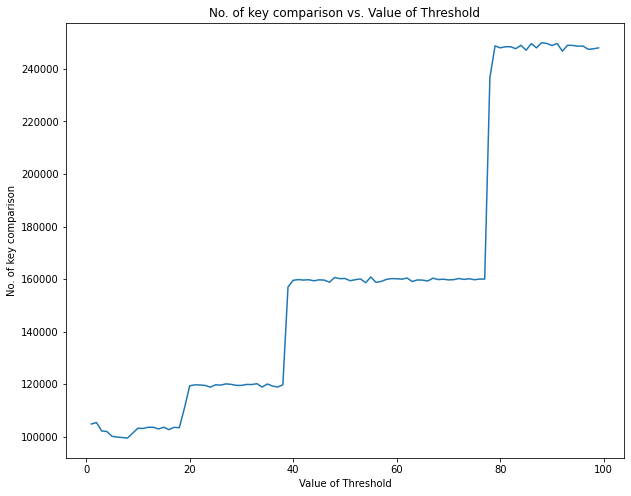

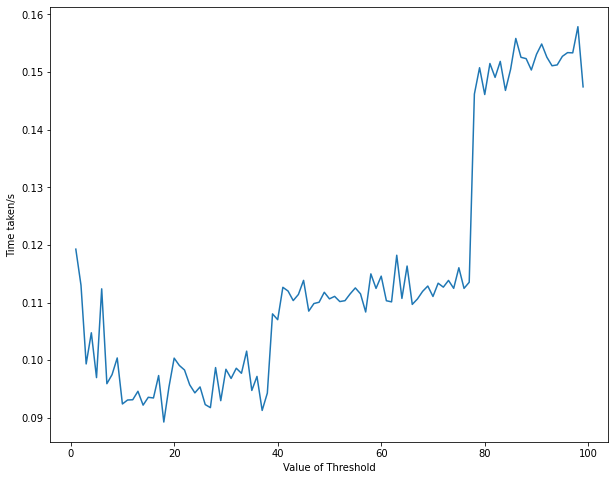

In [191]:
import timeit
import time
import numpy as np 
import matplotlib.pyplot as plt

# ii) test number of key comparison of different values of threshold S with input size n fixed
arr_numCmp = []
y_axis = []
y_axis_time = []
n = 10000
case = 5
S = 100


mean = 0
time = 0

numCmp = [0]

for i in range(1,S): # test S ranging from 1 to S
  print("S=%d:"%i)
  # we want to obtain ___ results of different random arrays for each threshold for reducing bias
  for j in range(case):
    arr = ranArr(n)
    time += timeit.timeit(stmt='insertionMergeHybrid(arr,i,numCmp)', setup='', number=1, globals = globals())
    mean+=numCmp[0]
    numCmp[0] = 0
  mean = mean/case
  time = time/case
  y_axis.append(mean)
  y_axis_time.append(time)
  print("mean: %d key comparisons" %mean)
  print("mean: %f seconds" %time)
  mean = 0
  time = 0
  print()

x = np.arange(1,S)
y = np.array(y_axis) 


# PLot
figure(figsize=(10, 8))
plt.plot(x,y) 

# Add Title

plt.title("No. of key comparison vs. Value of Threshold") 

# Add Axes Labels

plt.xlabel("Value of Threshold") 
plt.ylabel("No. of key comparison") 

# Display

plt.show()


y = np.array(y_axis_time)

figure(figsize=(10, 8))
plt.plot(x,y)

plt.xlabel("Value of Threshold") 
plt.ylabel("Time taken/s") 

plt.show()

**C(ii) (against time taken)**

S=1:
0.008759467000004406
0.008624977000067702
0.009829779000028793
0.009657987999958095
0.008842089000040687
0.01034712099999524
0.009869707999996535
0.010142917999928613
0.009311616999980288
0.009850240999980997
S=2:
0.00862123599995357
0.007989477999899464
0.007995090000008531
0.008764926000026207
0.00885039100000995
0.007640331000061451
0.008701870999971106
0.01250951100007569
0.007894171999964783
0.009343627999896853
S=3:
0.015177370999936102
0.00960383299991463
0.015658228000006602
0.007849309999983234
0.007237578999934158
0.008350898000003326
0.007922785000005206
0.008686894999982542
0.007518802999925356
0.007364918000007492
S=4:
0.007913846999940688
0.011371359999998276
0.009755946999916887
0.006696690000012495
0.007608570999991571
0.0072428949999903125
0.006941994999920098
0.006490447000032873
0.009593204999987393
0.006637763000071573
S=5:
0.007724289999941902
0.00687231399990651
0.012667650999901525
0.007720073999962551
0.006805837000001702
0.00815441899999314
0.0076587700000

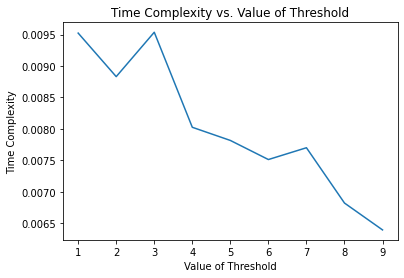

In [22]:
import timeit
import time
import numpy as np 
import matplotlib.pyplot as plt

# ii) test time complexity of different values of threshold S with input size n fixed
arr_time = []
y_axis = []
n = 1000
case = 5

for i in range(1,10): # test S ranging from 1 to 10
  print("S=%d:"%i)
  # we want to obtain ___ results of different random arrays for each threshold for reducing bias
  for j in range(case):
    arr = ranArr(n)
    timecomplex=timeit.timeit(stmt='insertionMergeHybrid(arr,i, numCmp)', setup='', number=1, globals = globals())
    print(timecomplex)
    arr_time.append(timecomplex)

print(arr_time)

for i in range(0,len(arr_time),case):
  mean = 0
  for j in range(case):
    # print(i+j)
    mean += arr_time[i+j]
  mean = mean/case
  y_axis.append(mean)

print(y_axis)
x = np.arange(1,10)
y = np.array(y_axis) 


# PLot

plt.plot(x,y) 

# Add Title

plt.title("Time Complexity vs. Value of Threshold") 

# Add Axes Labels

plt.xlabel("Value of Threshold") 
plt.ylabel("Time Complexity") 

# Display

plt.show()


**c(iii)**

n=1000:
mean: 7205 key comparisons
mean: 0.008294 seconds
mean: 6755 key comparisons
mean: 0.006904 seconds
mean: 6853 key comparisons
mean: 0.007004 seconds
mean: 7268 key comparisons
mean: 0.005856 seconds
mean: 7959 key comparisons
mean: 0.008030 seconds
mean: 7959 key comparisons
mean: 0.006399 seconds
mean: 7959 key comparisons
mean: 0.006507 seconds

n=10000:
mean: 104912 key comparisons
mean: 0.115831 seconds
mean: 99713 key comparisons
mean: 0.095807 seconds
mean: 103279 key comparisons
mean: 0.096288 seconds
mean: 103279 key comparisons
mean: 0.093623 seconds
mean: 119484 key comparisons
mean: 0.101297 seconds
mean: 119484 key comparisons
mean: 0.097965 seconds
mean: 119484 key comparisons
mean: 0.096171 seconds

n=100000:
mean: 1379747 key comparisons
mean: 1.418150 seconds
mean: 1346724 key comparisons
mean: 1.258409 seconds
mean: 1332246 key comparisons
mean: 1.183208 seconds
mean: 1400052 key comparisons
mean: 1.170275 seconds
mean: 1400052 key comparisons
mean: 1.176210 s

<Figure size 432x288 with 0 Axes>

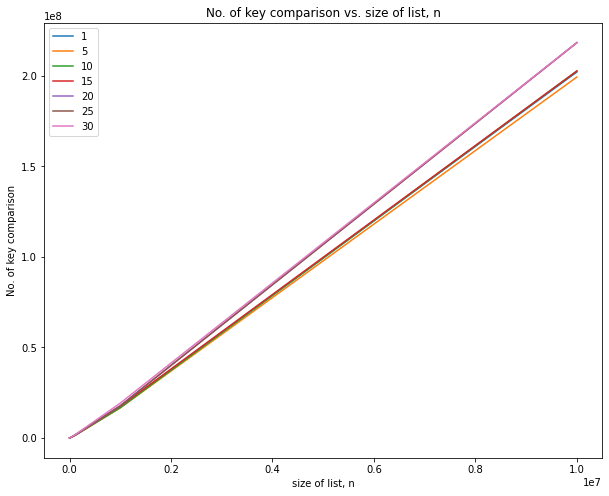

<Figure size 432x288 with 0 Axes>

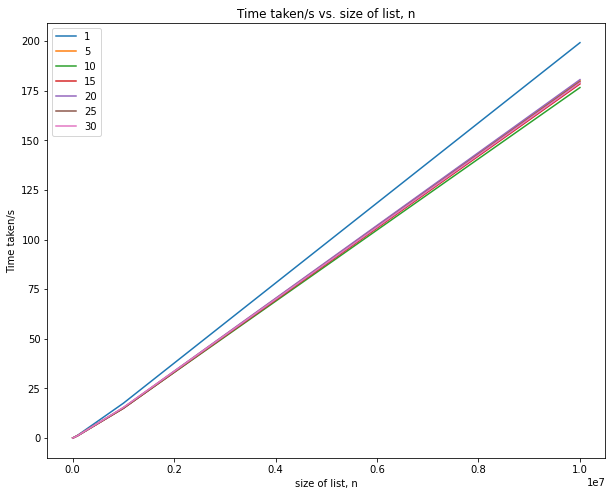

In [192]:
import timeit
import time
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



# threshold size
S = [1, 5, 10, 15, 20, 25, 30]
# varying values of input list size, n
n = [1000, 10000, 100000, 1000000, 10000000]
# number of cases to do for each size n
case = 5


y_axis = np.zeros((len(S),len(n)))
y_axis_time = np.zeros((len(S),len(n)))

# holds variable for number of key comparison for each test
numCmp = [0]

mean = np.zeros((len(S)))
time = np.zeros((len(S)))

arr1=[]

for i in range(len(n)):
  arr1.append([])
  for j in range(case):
    arr1[i].append(ranArr(n[i]))

for i in range(len(n)):
  print("n=%d:"%n[i])
  # we want to obtain ___ results of different random arrays for each n size for reducing bias
  for l in range(len(S)):
    for j in range(case):
      arr = arr1[i][j].copy()
      time[l] += timeit.timeit(stmt='insertionMergeHybrid(arr,S[l],numCmp)', setup='', number=1, globals = globals())
      mean[l] += numCmp[0]
      numCmp[0] = 0
    mean[l] = mean[l]/case
    time[l] = time[l]/case
    y_axis[l][i] = mean[l]
    y_axis_time[l][i] = time[l]
    print("mean: %d key comparisons" %mean[l])
    print("mean: %f seconds" %time[l])
    mean[l] = 0
    time[l] = 0
  print()


plt.figure()


figure(figsize=(10, 8))



# Add Title

plt.title("No. of key comparison vs. size of list, n") 

# Add Axes Labels

plt.xlabel("size of list, n") 
plt.ylabel("No. of key comparison") 

# PLot
for i in range(len(S)):
  plt.plot(n,y_axis[i], label=S[i]) 
plt.legend()


plt.figure()

figure(figsize=(10, 8))
# plt.ylim([0.05, 0.1])
plt.title("Time taken/s vs. size of list, n") 

plt.xlabel("size of list, n") 
plt.ylabel("Time taken/s") 

for i in range(len(S)):
  plt.plot(n,y_axis_time[i], label=S[i]) 
plt.legend()
plt.show()


**d)**

n=1000:
mean: 7213 key comparisons
mean: 0.008400 seconds
mean: 6932 key comparisons
mean: 0.006388 seconds

n=10000:
mean: 105404 key comparisons
mean: 0.119142 seconds
mean: 103630 key comparisons
mean: 0.090318 seconds

n=100000:
mean: 1384055 key comparisons
mean: 1.666719 seconds
mean: 1333450 key comparisons
mean: 1.175348 seconds

n=1000000:
mean: 17099389 key comparisons
mean: 16.902546 seconds
mean: 16735203 key comparisons
mean: 14.913669 seconds

n=10000000:
mean: 204128486 key comparisons
mean: 198.511090 seconds
mean: 202627549 key comparisons
mean: 175.914163 seconds



<Figure size 432x288 with 0 Axes>

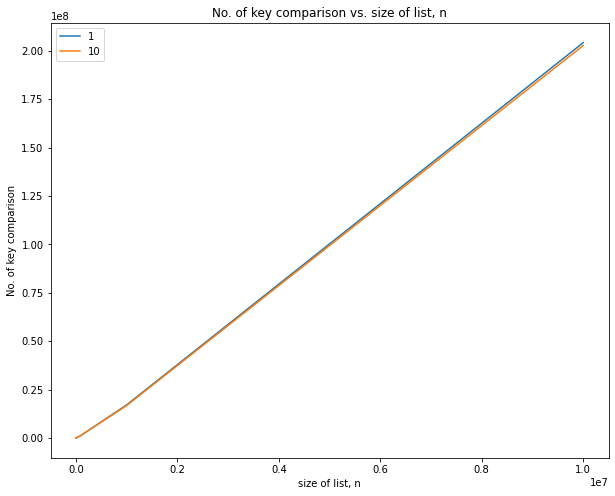

<Figure size 432x288 with 0 Axes>

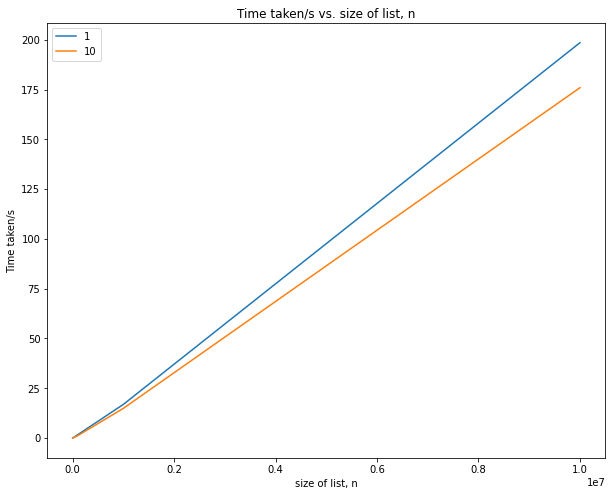

In [193]:
import timeit
import time
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



# threshold size
S = [1, 10]
# varying values of input list size, n
n = [1000, 10000, 100000, 1000000, 10000000]
# number of cases to do for each size n
case = 5


y_axis = np.zeros((len(S),len(n)))
y_axis_time = np.zeros((len(S),len(n)))

# holds variable for number of key comparison for each test
numCmp = [0]

mean = np.zeros((len(S)))
time = np.zeros((len(S)))

arr1=[]

for i in range(len(n)):
  arr1.append([])
  for j in range(case):
    arr1[i].append(ranArr(n[i]))

for i in range(len(n)):
  print("n=%d:"%n[i])
  # we want to obtain ___ results of different random arrays for each n size for reducing bias
  for l in range(len(S)):
    for j in range(case):
      arr = arr1[i][j].copy()
      time[l] += timeit.timeit(stmt='insertionMergeHybrid(arr,S[l],numCmp)', setup='', number=1, globals = globals())
      mean[l] += numCmp[0]
      numCmp[0] = 0
    mean[l] = mean[l]/case
    time[l] = time[l]/case
    y_axis[l][i] = mean[l]
    y_axis_time[l][i] = time[l]
    print("mean: %d key comparisons" %mean[l])
    print("mean: %f seconds" %time[l])
    mean[l] = 0
    time[l] = 0
  print()


plt.figure()


figure(figsize=(10, 8))



# Add Title

plt.title("No. of key comparison vs. size of list, n") 

# Add Axes Labels

plt.xlabel("size of list, n") 
plt.ylabel("No. of key comparison") 

# PLot
for i in range(len(S)):
  plt.plot(n,y_axis[i], label=S[i]) 
plt.legend()


plt.figure()

figure(figsize=(10, 8))
# plt.ylim([0.05, 0.1])
plt.title("Time taken/s vs. size of list, n") 

plt.xlabel("size of list, n") 
plt.ylabel("Time taken/s") 

for i in range(len(S)):
  plt.plot(n,y_axis_time[i], label=S[i]) 
plt.legend()
plt.show()


11% average decrease in time taken using hybrid sort for n=10,000,000 and S=10


**Unlabelled**

In [ ]:
import timeit
import time
import numpy as np 
import matplotlib.pyplot as plt

# ii) test time complexity of different values of threshold S with input size n fixed
arr_time = []
y_axis = []
n = 1000000
case = 10

for i in range(1,20): # test S ranging from 1 to 10
  print("S=%d:"%i)
  # we want to obtain ___ results of different random arrays for each threshold for reducing bias
  for j in range(case):
    arr = ranArr(n)
    timecomplex=timeit.timeit(stmt='insertionMergeHybrid(arr,i)', setup='', number=1, globals = globals())
    print(timecomplex)
    arr_time.append(timecomplex)

print(arr_time)

for i in range(0,len(arr_time),case):
  mean = 0
  for j in range(case):
    # print(i+j)
    mean += arr_time[i+j]
  mean = mean/case
  y_axis.append(mean)

print(y_axis)
x = np.arange(1,20)
y = np.array(y_axis) 


# PLot

plt.plot(x,y) 

# Add Title

plt.title("Time Complexity vs. Value of Threshold") 

# Add Axes Labels

plt.xlabel("Value of Threshold") 
plt.ylabel("Time Complexity") 

# Display

plt.show()

S=1:
12.913461586000267
13.018313547000616
13.05749488299989
11.696103455999946
12.670443869000337
11.711918766000053
11.757446307000464
12.755488484000125
11.807703796999704
11.721657824999966
S=2:
12.353217902000324
11.024221512000622
12.407637133999742
11.11548995799967
11.038027051999961
11.072009143000287
11.165456411999912
11.104765174999557
12.500139087000207
11.10617508300038
S=3:
10.916159835999679
10.919014916000378
10.92501698200067
12.357072419999895
11.023108695999326
11.015490306000174
12.303471758999876
11.040591373999632
10.949816154000473
11.009768303000783
S=4:
10.558440916000109
10.568915208999897
10.506167208999614
10.52978841500044
10.660043290999965
13.402341257000444
10.625919697999961
12.262475700000323
12.418618159999824
10.710348257999613
S=5:
10.543310189000294
10.462987874999271
10.549409201999879
11.100192091999816
11.068858008999996
10.605947646999994
11.164770330000465


KeyboardInterrupt: ignored

**Test**

In [153]:
import timeit
import time

# stmt is the code we want to time
# setup is the code we want to execute before the actual stmt (not timed)
# timer is the timer to use
# number is the number of times stmt is repeated
# globals specifies the namespace the code is executing in

# print(timeit.timeit(stmt='', setup='', timer='time.perf_counter', number=1, globals=None))

# Generate two identical random array of specified size
n = 10000
arr = ranArr(n)
arr1 = arr.copy()
arr2 = arr.copy()
arr3 = arr.copy()

mergeSortNumCmp = [0]
hybridSortNumCmp = [0]
hybridSortNumCmp1 = [0]


# print(timeit.timeit(stmt='insertionSort(arr)', setup='', number=1, globals = globals()))
#for i in range(len(arr)):
#  print("%d " % arr[i], end = "")

print("")
#print("")

# prints time taken to complete mergesort
print(timeit.timeit(stmt='mergeSort(arr1, mergeSortNumCmp)', setup='', number=1, globals = globals()))
print(mergeSortNumCmp[0])

print("")

# prints time taken to complete insertionMergeHybrid with threshold n=10
print(timeit.timeit(stmt='insertionMergeHybrid(arr2, 8, hybridSortNumCmp)', setup='', number=1, globals = globals()))
print(hybridSortNumCmp[0])

print("")

# prints time taken to complete insertionMergeHybrid with threshold n=20
print(timeit.timeit(stmt='insertionMergeHybrid(arr3, 20, hybridSortNumCmp1)', setup='', number=1, globals = globals())) 
print(hybridSortNumCmp1[0])


0.11100965000150609
105047

0.0904035350013146
99448

0.09412114400038263
119568
